<a href="https://colab.research.google.com/github/tigerofmurder/FuzzySegeno/blob/main/FuzzySugeno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# DEFINICION DE SUGENO
Se requiere 2 conjuntos difusos 


Para este ejemplo seran:
*   Servicio
*   Comida




In [15]:
data = pd.read_excel("https://github.com/tigerofmurder/FuzzySegeno/blob/main/test.xlsx?raw=true")
data

,id,servicio,comida
0,1,58,7
1,2,54,1
2,3,98,2
3,4,52,4
4,5,11,4
...,...,...,...
95,96,30,1
96,97,25,3
97,98,27,10
98,99,8,6


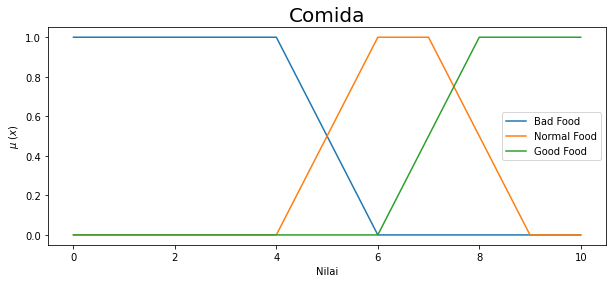

In [7]:
def BadFood(f):
    BadFood, notBadFood = 4, 6
    if f <= BadFood:
        return 1
    elif f > notBadFood:
        return 0
    elif f > BadFood and f <= notBadFood:
        return ((notBadFood - f) / (notBadFood - BadFood))

def NormalFood(f):
    notNormalFood1, NormalFood1, NormalFood2, notNormalFood2 = 4, 6, 7, 9
    if f > NormalFood1 and f <= NormalFood2:
        return 1
    elif f <= notNormalFood1 or f > notNormalFood2:
        return 0
    elif f > notNormalFood1 and f <= NormalFood1:
        return ((f - notNormalFood1) / (NormalFood1 - notNormalFood1))
    elif f > NormalFood2 and f <= notNormalFood2:
        return ((notNormalFood2 - f) / (notNormalFood2 - NormalFood2))

def GoodFood(f):
    notGoodFood, GoodFood = 6, 8
    if f > GoodFood:
        return 1
    elif f <= notGoodFood:
        return 0
    elif f > notGoodFood and f <= GoodFood:
        return ((f - notGoodFood) / (GoodFood - notGoodFood))

x = [i for i in range(11)]

ybadF = [BadFood(i) for i in x]
ynormalF = [NormalFood(i) for i in x]
ygoodF = [GoodFood(i) for i in x]

plt.figure(figsize=(10,4))
plt.title('Comida',fontsize = 20) 
plt.plot(x, ybadF, label = 'Bad Food')
plt.plot(x, ynormalF, label = 'Normal Food')
plt.plot(x, ygoodF, label = 'Good Food')
plt.xlabel('Nilai')
plt.ylabel(r'$\mu\ (x)$')
plt.legend()

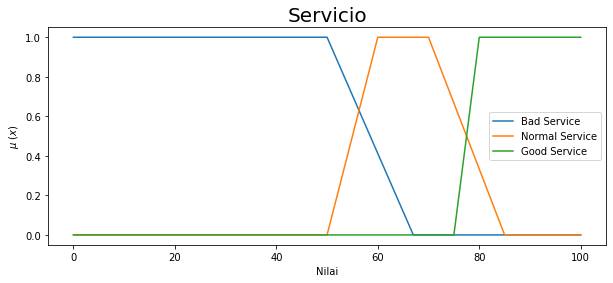

In [8]:
def BadService(x):
  badService = 50
  notbadService = 67

  if x <= badService:
    return 1;
  elif x > notbadService:
    return 0
  elif x > badService and x <= notbadService:
    return (notbadService - x) / (notbadService - badService)

def NormalService(x):
  notnormalService1 = 50
  normalService1 = 60
  normalService2 = 70
  notnormalService2 = 85

  if x > normalService1 and x <= normalService2:
    return 1
  elif x <= notnormalService1 or x > notnormalService2:
    return 0
  elif x > notnormalService1 and x <= normalService1:
    return (x - notnormalService1) / (normalService1 - notnormalService1)
  elif x > normalService2 and x <= notnormalService2:
    return (notnormalService2 - x) / (notnormalService2 - normalService2)

def GoodService(x):
  notgoodService = 75
  goodService = 80

  if x > goodService:
    return 1
  elif x <= notgoodService:
    return 0
  elif x > notgoodService and x <= goodService:
    return (x - notgoodService) / (goodService - notgoodService)

x = [i for i in range(101)]
ybadS = [BadService(i) for i in x]
ynormalS = [NormalService(i) for i in x]
ygoodS = [GoodService(i) for i in x]

plt.figure(figsize=(10,4))
plt.title('Servicio',fontsize = 20) 
plt.plot(x, ybadS, label = 'Bad Service')
plt.plot(x, ynormalS, label = 'Normal Service')
plt.plot(x, ygoodS, label = 'Good Service')
plt.xlabel('Nilai')
plt.ylabel(r'$\mu\ (x)$')
plt.legend()

# METODOS

*   Fuzzificacion
*   Inferencia
*   Defuzzificacion




In [9]:
def fuzzificationFood(foodValue):
  foodSet = []
  foodSet.append(BadFood(foodValue))
  foodSet.append(NormalFood(foodValue))
  foodSet.append(GoodFood(foodValue))
  return foodSet

def fuzzificationService(serviceValue):
  serviceSet = []
  serviceSet.append(BadService(serviceValue))
  serviceSet.append(NormalService(serviceValue))
  serviceSet.append(GoodService(serviceValue))
  return serviceSet

In [10]:
def inference(serviceSet, foodSet):
  inferenceSet = []
  recommendedSet, moderatelySet, notRecommendedSet = [], [], []

  recommendedSet.append(min(foodSet[2], serviceSet[2]))
  recommendedSet.append(min(foodSet[2], serviceSet[1]))
  recommendedSet.append(min(foodSet[1], serviceSet[2]))
  

  moderatelySet.append(min(foodSet[1], serviceSet[1]))
  moderatelySet.append(min(foodSet[2], serviceSet[0]))

  notRecommendedSet.append(min(foodSet[0], serviceSet[0]))
  notRecommendedSet.append(min(foodSet[1], serviceSet[0]))
  notRecommendedSet.append(min(foodSet[0], serviceSet[1]))
  notRecommendedSet.append(min(foodSet[0], serviceSet[2]))

  inferenceSet.append(max(recommendedSet))
  inferenceSet.append(max(moderatelySet))
  inferenceSet.append(max(notRecommendedSet))
  
  return inferenceSet

In [11]:
def defuzzification(inferenceSet):
  multiplier = (inferenceSet[0]*100) + (inferenceSet[1]*80) + (inferenceSet[2]*50) 
  divider = inferenceSet[0] + inferenceSet[1] + inferenceSet[2]
  return multiplier/divider

In [16]:
Result = []
for row in range(100):
  fuzziService = fuzzificationService(data['servicio'][row])
  fuzziFood = fuzzificationFood(data['comida'][row])
  inferensi = inference(fuzziService,fuzziFood)
  Result.extend([defuzzification(inferensi)])
 
data['fuzzy'] = Result
data

,id,servicio,comida,fuzzy
0,1,58,7,76.784566
1,2,54,1,50.000000
2,3,98,2,50.000000
3,4,52,4,50.000000
4,5,11,4,50.000000
...,...,...,...,...
95,96,30,1,50.000000
96,97,25,3,50.000000
97,98,27,10,80.000000
98,99,8,6,50.000000
